<a href="https://colab.research.google.com/github/FlopezRbf/analisis-vuelos-aerolineas/blob/main/Analisis_Vuelos_GitHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Vuelos de Aerolíneas
## Optimización de Precios y Patrones de Compra

---

### Abstracto

**Motivación:**

La industria de la aviación maneja precios dinámicos complejos que varían según múltiples factores: anticipación de compra, aerolínea, ruta, horarios y clase. Para viajeros frecuentes, empresas y agencias de viaje, **entender estos patrones puede significar ahorros significativos** (hasta 60-70% en algunos casos).

Este proyecto analiza **300,153 registros de vuelos** para descubrir patrones de precios, identificar oportunidades de ahorro y proporcionar recomendaciones basadas en datos.

**Audiencia:**
- 🧳 **Viajeros frecuentes**: Personas que buscan optimizar sus gastos de viaje
- ✈️ **Agencias de viaje**: Empresas que necesitan ofrecer mejores precios a clientes
- 💼 **Departamentos corporativos**: Equipos que gestionan presupuestos de viajes de negocios
- 🚀 **Startups de travel-tech**: Empresas desarrollando herramientas de comparación de precios

---

### Preguntas de Investigación e Hipótesis

#### 1. Optimización de Timing de Compra
**Pregunta**: ¿Cuándo es el mejor momento para comprar un vuelo y obtener el mejor precio?

**Hipótesis**: Los vuelos comprados con 20-30 días de anticipación tienen precios significativamente menores que los comprados con menos de 7 días.

#### 2. Impacto de Escalas en Precio
**Pregunta**: ¿Cómo afectan las escalas al precio y duración de los vuelos?

**Hipótesis**: Los vuelos directos son 40-60% más caros que vuelos con escalas, pero reducen el tiempo de viaje en más del 50%.

#### 3. Diferencias entre Aerolíneas
**Pregunta**: ¿Qué aerolíneas ofrecen los mejores precios para rutas similares?

**Hipótesis**: Aerolíneas low-cost (SpiceJet, AirAsia) tienen precios 30-40% menores que aerolíneas premium (Vistara, Air India) para las mismas rutas.

#### 4. Impacto del Horario de Vuelo
**Pregunta**: ¿Los horarios de salida/llegada afectan significativamente el precio?

**Hipótesis**: Vuelos en horarios "premium" (mañana temprano, tarde-noche) son 15-25% más caros que vuelos en horarios intermedios.

#### 5. Análisis de Rutas Populares
**Pregunta**: ¿Cuáles son las rutas más caras y más baratas? ¿Por qué?

**Hipótesis**: Rutas de alta demanda (Delhi-Mumbai, Bangalore-Delhi) tienen mayor variabilidad de precios y precios promedio más altos.

#### 6. Clase de Vuelo y Valor
**Pregunta**: ¿Cuál es la diferencia de precio entre Economy y Business? ¿Vale la pena?

**Hipótesis**: La clase Business cuesta 3-4 veces más que Economy, pero la diferencia se reduce en vuelos de corta duración.

---

## 1. Importación de Datos y Configuración

In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de visualizaciones
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10



In [4]:
# Carga dataset desde GitHub

github_url = 'https://raw.githubusercontent.com/FlopezRbf/analisis-vuelos-aerolineas/main/airlines_flights_dataset.csv'



---

## 2. Análisis Exploratorio de Datos (EDA)

### 2.1 Información General del Dataset

In [5]:
# Primeras filas del dataset
print("📋 Primeras 5 filas del dataset:\n")
df.head()

📋 Primeras 5 filas del dataset:



,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
# Información del dataset
print("ℹ️ Información del Dataset:\n")
df.info()

ℹ️ Información del Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [7]:
# Estadísticas descriptivas
print("📊 Estadísticas Descriptivas:\n")
df.describe()

📊 Estadísticas Descriptivas:



,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [8]:
# Verificar valores nulos
print("🔍 Valores Nulos por Columna:\n")
null_counts = df.isnull().sum()
print(null_counts)
print(f"\n✅ Total de valores nulos: {null_counts.sum()}")

🔍 Valores Nulos por Columna:

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

✅ Total de valores nulos: 0


In [9]:
# Resumen ejecutivo
print("="*60)
print("RESUMEN EJECUTIVO DEL DATASET")
print("="*60)
print(f"\n📊 Registros totales: {len(df):,}")
print(f"📋 Columnas: {len(df.columns)}")
print(f"✈️ Aerolíneas únicas: {df['airline'].nunique()}")
print(f"🗺️ Rutas únicas: {len(df.groupby(['source_city', 'destination_city']))}")
print(f"\n💰 Rango de Precios:")
print(f"   - Mínimo: ₹{df['price'].min():,.0f}")
print(f"   - Promedio: ₹{df['price'].mean():,.0f}")
print(f"   - Mediana: ₹{df['price'].median():,.0f}")
print(f"   - Máximo: ₹{df['price'].max():,.0f}")
print(f"\n⏱️ Duración de Vuelos:")
print(f"   - Mínimo: {df['duration'].min():.2f} horas")
print(f"   - Promedio: {df['duration'].mean():.2f} horas")
print(f"   - Máximo: {df['duration'].max():.2f} horas")
print("="*60)

RESUMEN EJECUTIVO DEL DATASET

📊 Registros totales: 300,153
📋 Columnas: 12
✈️ Aerolíneas únicas: 6
🗺️ Rutas únicas: 30

💰 Rango de Precios:
   - Mínimo: ₹1,105
   - Promedio: ₹20,890
   - Mediana: ₹7,425
   - Máximo: ₹123,071

⏱️ Duración de Vuelos:
   - Mínimo: 0.83 horas
   - Promedio: 12.22 horas
   - Máximo: 49.83 horas


### 2.2 Análisis Univariado

In [10]:
# Distribución de aerolíneas
print("✈️ Distribución de Vuelos por Aerolínea:\n")
airline_dist = df['airline'].value_counts()
airline_pct = df['airline'].value_counts(normalize=True) * 100

airline_summary = pd.DataFrame({
    'Vuelos': airline_dist,
    'Porcentaje': airline_pct.round(2)
})
print(airline_summary)

✈️ Distribución de Vuelos por Aerolínea:

           Vuelos  Porcentaje
airline                      
Vistara    127859       42.60
Air_India   80892       26.95
Indigo      43120       14.37
GO_FIRST    23173        7.72
AirAsia     16098        5.36
SpiceJet     9011        3.00


In [11]:
# Distribución de escalas
print("🛬 Distribución de Vuelos por Número de Escalas:\n")
stops_dist = df['stops'].value_counts()
stops_pct = df['stops'].value_counts(normalize=True) * 100

stops_summary = pd.DataFrame({
    'Vuelos': stops_dist,
    'Porcentaje': stops_pct.round(2)
})
print(stops_summary)

🛬 Distribución de Vuelos por Número de Escalas:

             Vuelos  Porcentaje
stops                          
one          250863       83.58
zero          36004       12.00
two_or_more   13286        4.43


In [12]:
# Distribución de clases
print("💺 Distribución de Vuelos por Clase:\n")
class_dist = df['class'].value_counts()
class_pct = df['class'].value_counts(normalize=True) * 100

class_summary = pd.DataFrame({
    'Vuelos': class_dist,
    'Porcentaje': class_pct.round(2)
})
print(class_summary)

💺 Distribución de Vuelos por Clase:

          Vuelos  Porcentaje
class                       
Economy   206666       68.85
Business   93487       31.15


### 2.3 Análisis Bivariado y Visualizaciones Ejecutivas

#### 📊 Visualización 1: El Momento Perfecto para Comprar

🎯 VENTANA ÓPTIMA DE COMPRA
Mejor momento: 47 días antes del vuelo
Precio promedio: ₹18,553
Ahorro vs compra de último momento: ₹7,680


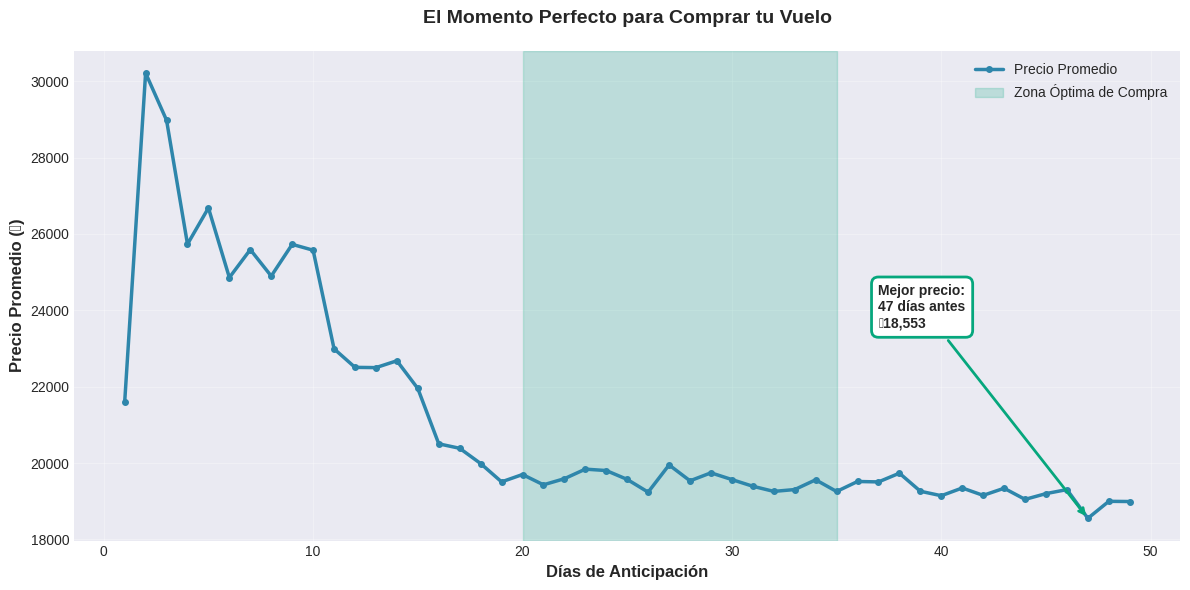

In [13]:
# Análisis de precio vs días de anticipación
price_by_days = df.groupby('days_left')['price'].agg(['mean', 'median', 'count']).reset_index()

# Encontrar ventana óptima
optimal_day = price_by_days.loc[price_by_days['mean'].idxmin(), 'days_left']
optimal_price = price_by_days.loc[price_by_days['mean'].idxmin(), 'mean']
last_minute_price = price_by_days[price_by_days['days_left'] <= 7]['mean'].mean()
savings = last_minute_price - optimal_price

print("🎯 VENTANA ÓPTIMA DE COMPRA")
print("="*50)
print(f"Mejor momento: {int(optimal_day)} días antes del vuelo")
print(f"Precio promedio: ₹{optimal_price:,.0f}")
print(f"Ahorro vs compra de último momento: ₹{savings:,.0f}")
print("="*50)

# Visualización
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(price_by_days['days_left'], price_by_days['mean'],
        linewidth=2.5, color='#2E86AB', label='Precio Promedio', marker='o', markersize=4)

# Zona óptima
ax.axvspan(20, 35, alpha=0.2, color='#06A77D', label='Zona Óptima de Compra')

ax.set_xlabel('Días de Anticipación', fontsize=12, fontweight='bold')
ax.set_ylabel('Precio Promedio (₹)', fontsize=12, fontweight='bold')
ax.set_title('El Momento Perfecto para Comprar tu Vuelo', fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)

# Anotación
ax.annotate(f'Mejor precio:\n{int(optimal_day)} días antes\n₹{int(optimal_price):,}',
            xy=(optimal_day, optimal_price),
            xytext=(optimal_day-10, optimal_price+5000),
            arrowprops=dict(arrowstyle='->', color='#06A77D', lw=2),
            fontsize=10, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='#06A77D', linewidth=2))

plt.tight_layout()
plt.show()

#### 📊 Visualización 2: Comparación de Aerolíneas

✈️ ANÁLISIS DE PRECIOS POR AEROLÍNEA
  airline   price_mean  price_median  flight_count  avg_duration
  AirAsia  4091.072742        3276.0         16098      8.941714
   Indigo  5324.216303        4453.0         43120      5.795197
 GO_FIRST  5652.007595        5336.0         23173      8.755380
 SpiceJet  6179.278881        5654.0          9011     12.579767
Air_India 23507.019112       11520.0         80892     15.504235
  Vistara 30396.536302       15543.0        127859     13.326634


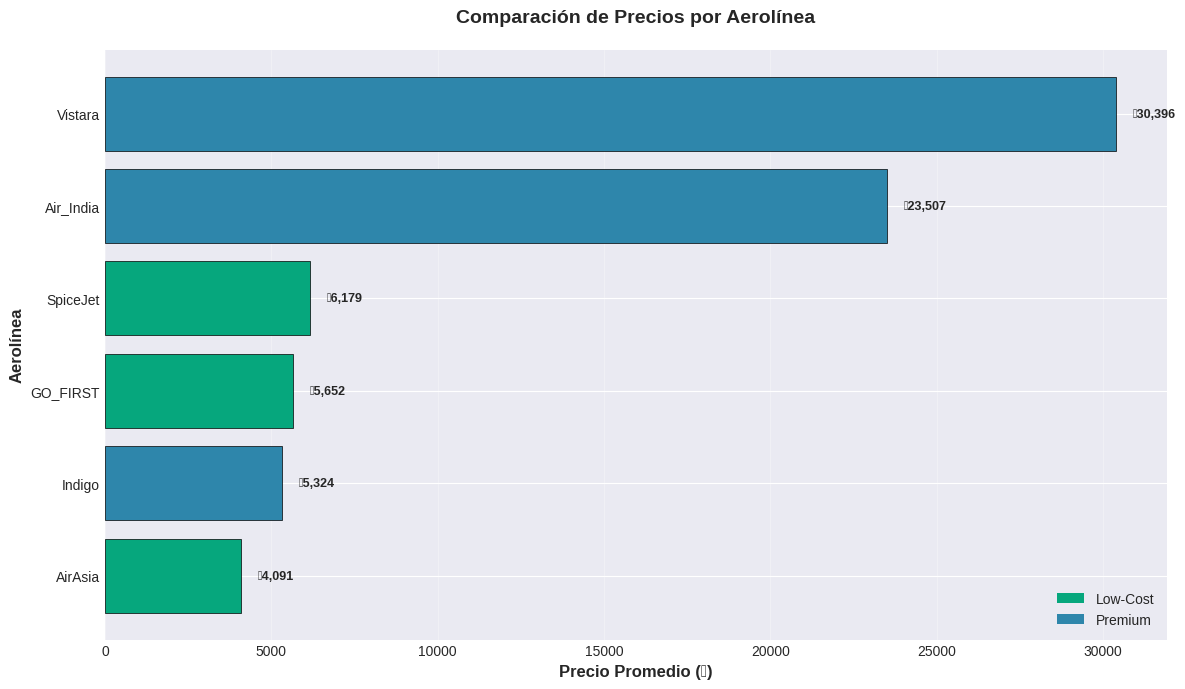

In [14]:
# Análisis por aerolínea
airline_stats = df.groupby('airline').agg({
    'price': ['mean', 'median', 'count'],
    'duration': 'mean'
}).reset_index()
airline_stats.columns = ['airline', 'price_mean', 'price_median', 'flight_count', 'avg_duration']
airline_stats = airline_stats.sort_values('price_mean', ascending=True)

print("✈️ ANÁLISIS DE PRECIOS POR AEROLÍNEA")
print("="*80)
print(airline_stats.to_string(index=False))
print("="*80)

# Visualización
fig, ax = plt.subplots(figsize=(12, 7))

# Clasificar aerolíneas
low_cost = ['SpiceJet', 'AirAsia', 'GO_FIRST']
colors = ['#06A77D' if airline in low_cost else '#2E86AB'
          for airline in airline_stats['airline']]

bars = ax.barh(airline_stats['airline'], airline_stats['price_mean'],
               color=colors, edgecolor='black', linewidth=0.5)

# Etiquetas de valor
for i, (bar, value) in enumerate(zip(bars, airline_stats['price_mean'])):
    ax.text(value + 500, bar.get_y() + bar.get_height()/2,
            f'₹{int(value):,}',
            va='center', fontsize=9, fontweight='bold')

ax.set_xlabel('Precio Promedio (₹)', fontsize=12, fontweight='bold')
ax.set_ylabel('Aerolínea', fontsize=12, fontweight='bold')
ax.set_title('Comparación de Precios por Aerolínea', fontsize=14, fontweight='bold', pad=20)

# Leyenda
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#06A77D', label='Low-Cost'),
    Patch(facecolor='#2E86AB', label='Premium')
]
ax.legend(handles=legend_elements, loc='lower right')

ax.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

#### 📊 Visualización 3: El Costo de la Conveniencia (Escalas)

🛬 IMPACTO DE LAS ESCALAS
      stops   price_mean  price_median  flight_count  avg_duration
        one 22900.992482        7959.0        250863     13.496514
two_or_more 14113.450775        8307.0         13286     15.317141
       zero  9375.938535        4499.0         36004      2.191324


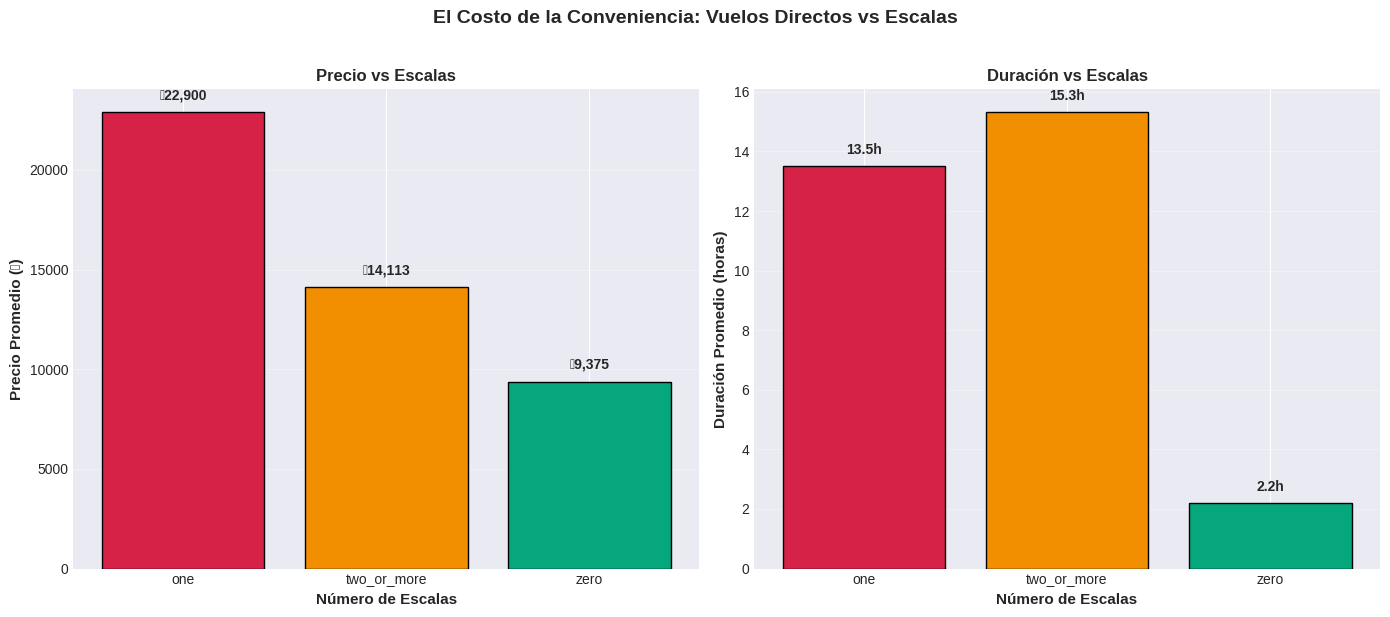

In [15]:
# Análisis de escalas
stops_stats = df.groupby('stops').agg({
    'price': ['mean', 'median', 'count'],
    'duration': 'mean'
}).reset_index()
stops_stats.columns = ['stops', 'price_mean', 'price_median', 'flight_count', 'avg_duration']

print("🛬 IMPACTO DE LAS ESCALAS")
print("="*70)
print(stops_stats.to_string(index=False))
print("="*70)

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Precio
colors_stops = ['#D62246', '#F18F01', '#06A77D']
bars1 = ax1.bar(stops_stats['stops'], stops_stats['price_mean'],
                color=colors_stops, edgecolor='black', linewidth=1)

for bar, value in zip(bars1, stops_stats['price_mean']):
    ax1.text(bar.get_x() + bar.get_width()/2, value + 500,
            f'₹{int(value):,}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

ax1.set_xlabel('Número de Escalas', fontsize=11, fontweight='bold')
ax1.set_ylabel('Precio Promedio (₹)', fontsize=11, fontweight='bold')
ax1.set_title('Precio vs Escalas', fontsize=12, fontweight='bold')
ax1.grid(True, axis='y', alpha=0.3)

# Gráfico 2: Duración
bars2 = ax2.bar(stops_stats['stops'], stops_stats['avg_duration'],
                color=colors_stops, edgecolor='black', linewidth=1)

for bar, value in zip(bars2, stops_stats['avg_duration']):
    ax2.text(bar.get_x() + bar.get_width()/2, value + 0.3,
            f'{value:.1f}h',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

ax2.set_xlabel('Número de Escalas', fontsize=11, fontweight='bold')
ax2.set_ylabel('Duración Promedio (horas)', fontsize=11, fontweight='bold')
ax2.set_title('Duración vs Escalas', fontsize=12, fontweight='bold')
ax2.grid(True, axis='y', alpha=0.3)

fig.suptitle('El Costo de la Conveniencia: Vuelos Directos vs Escalas',
             fontsize=14, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()

#### 📊 Visualización 4: Horarios que Cuestan Más

🕐 PRECIOS POR HORARIO DE SALIDA
departure_time   price_mean  price_median  flight_count
 Early_Morning 20370.676718        7212.0         66790
       Morning 21630.760254        8112.0         71146
     Afternoon 18179.203331        6663.0         47794
       Evening 21232.361894        7425.0         65102
         Night 23062.146808        7813.0         48015
    Late_Night  9295.299387        4499.0          1306


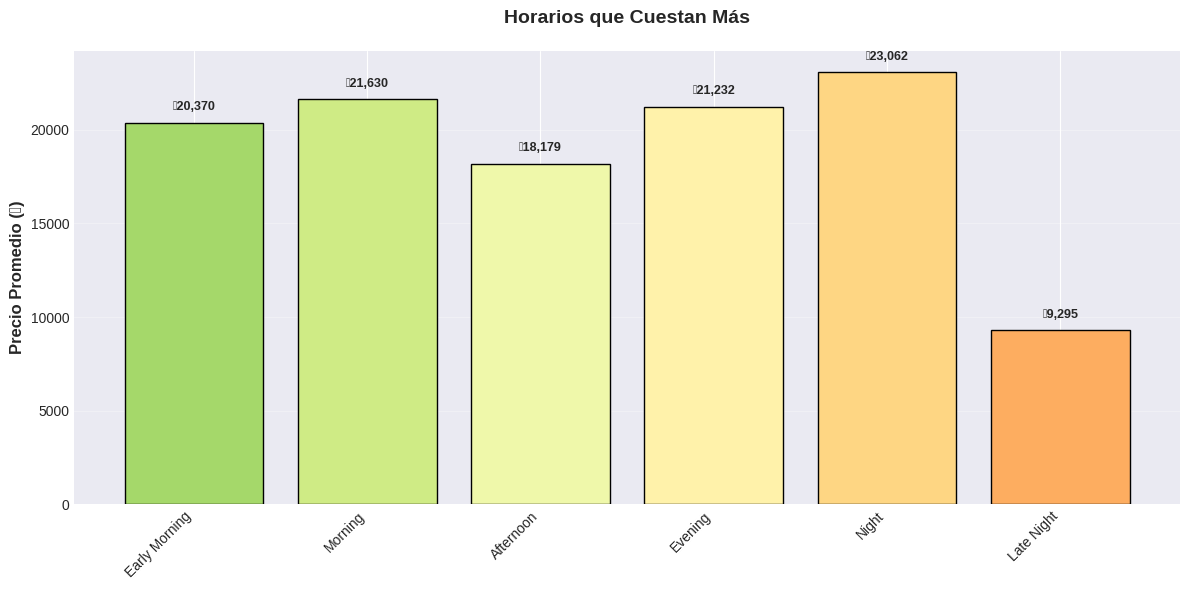

In [16]:
# Análisis por horario
time_stats = df.groupby('departure_time')['price'].agg(['mean', 'median', 'count']).reset_index()
time_stats.columns = ['departure_time', 'price_mean', 'price_median', 'flight_count']

# Orden lógico
time_order = ['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night']
time_stats['departure_time'] = pd.Categorical(time_stats['departure_time'],
                                               categories=time_order, ordered=True)
time_stats = time_stats.sort_values('departure_time')

print("🕐 PRECIOS POR HORARIO DE SALIDA")
print("="*70)
print(time_stats.to_string(index=False))
print("="*70)

# Visualización
fig, ax = plt.subplots(figsize=(12, 6))

colors_gradient = plt.cm.RdYlGn_r(np.linspace(0.3, 0.7, len(time_stats)))
bars = ax.bar(range(len(time_stats)), time_stats['price_mean'],
              color=colors_gradient, edgecolor='black', linewidth=1)

ax.set_xticks(range(len(time_stats)))
ax.set_xticklabels([t.replace('_', ' ') for t in time_stats['departure_time']],
                   rotation=45, ha='right')

for i, (bar, value) in enumerate(zip(bars, time_stats['price_mean'])):
    ax.text(bar.get_x() + bar.get_width()/2, value + 500,
            f'₹{int(value):,}',
            ha='center', va='bottom', fontsize=9, fontweight='bold')

ax.set_ylabel('Precio Promedio (₹)', fontsize=12, fontweight='bold')
ax.set_title('Horarios que Cuestan Más', fontsize=14, fontweight='bold', pad=20)
ax.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

#### 📊 Visualización 5: Rutas Más y Menos Costosas

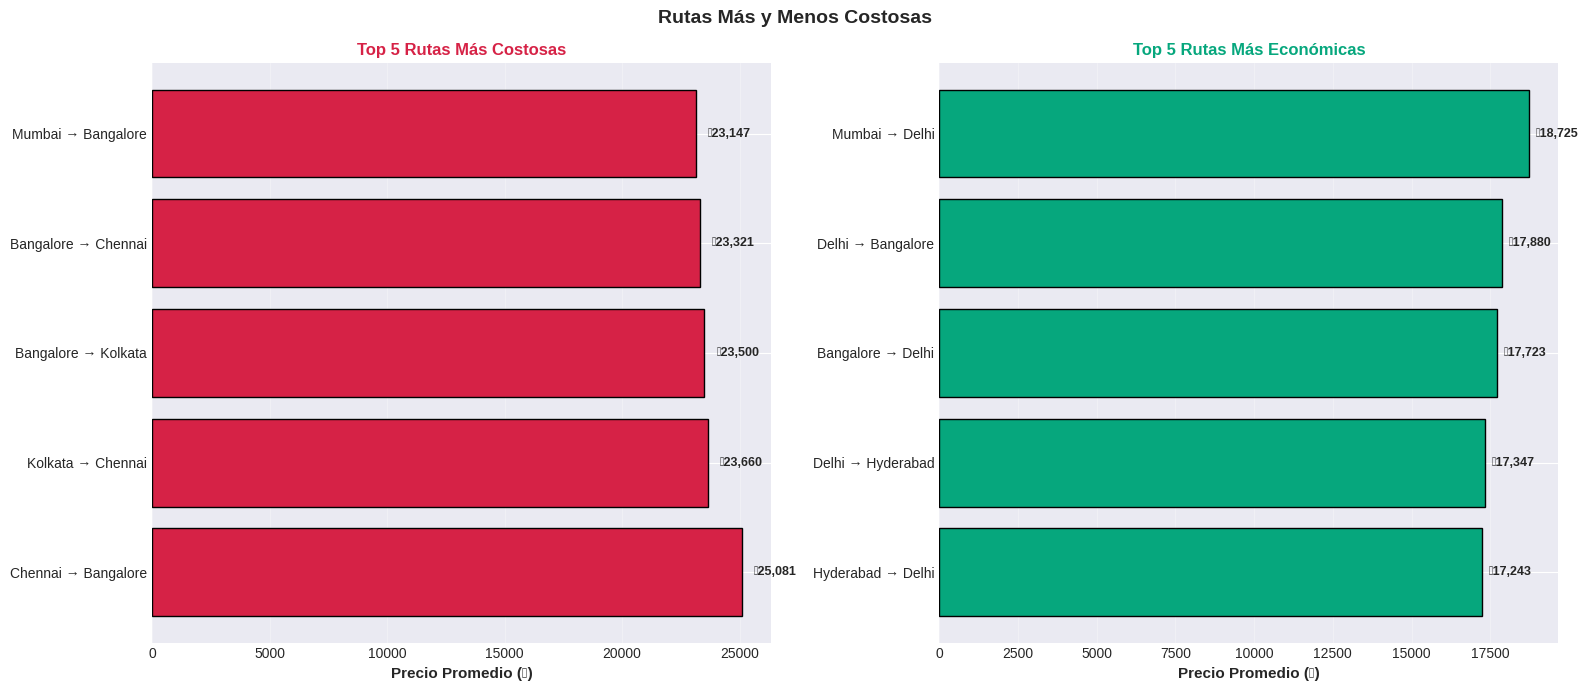

In [17]:
# Análisis de rutas
df['route'] = df['source_city'] + ' → ' + df['destination_city']
route_stats = df.groupby('route')['price'].mean().reset_index()
route_stats.columns = ['route', 'price_mean']

# Top 5 más caras y más baratas
top_expensive = route_stats.nlargest(5, 'price_mean')
top_cheap = route_stats.nsmallest(5, 'price_mean')

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Más caras
bars1 = ax1.barh(range(len(top_expensive)), top_expensive['price_mean'],
                 color='#D62246', edgecolor='black', linewidth=1)
ax1.set_yticks(range(len(top_expensive)))
ax1.set_yticklabels(top_expensive['route'])
ax1.set_xlabel('Precio Promedio (₹)', fontsize=11, fontweight='bold')
ax1.set_title('Top 5 Rutas Más Costosas', fontsize=12, fontweight='bold', color='#D62246')
ax1.grid(True, axis='x', alpha=0.3)

for bar, value in zip(bars1, top_expensive['price_mean']):
    ax1.text(value + 500, bar.get_y() + bar.get_height()/2,
            f'₹{int(value):,}',
            va='center', fontsize=9, fontweight='bold')

# Más baratas
bars2 = ax2.barh(range(len(top_cheap)), top_cheap['price_mean'],
                 color='#06A77D', edgecolor='black', linewidth=1)
ax2.set_yticks(range(len(top_cheap)))
ax2.set_yticklabels(top_cheap['route'])
ax2.set_xlabel('Precio Promedio (₹)', fontsize=11, fontweight='bold')
ax2.set_title('Top 5 Rutas Más Económicas', fontsize=12, fontweight='bold', color='#06A77D')
ax2.grid(True, axis='x', alpha=0.3)

for bar, value in zip(bars2, top_cheap['price_mean']):
    ax2.text(value + 200, bar.get_y() + bar.get_height()/2,
            f'₹{int(value):,}',
            va='center', fontsize=9, fontweight='bold')

fig.suptitle('Rutas Más y Menos Costosas', fontsize=14, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()

#### 📊 Visualización 6: Economy vs Business

💺 COMPARACIÓN ECONOMY VS BUSINESS
   class   price_mean  price_median  price_min  price_max  flight_count
Business 52540.081124       53164.0      12000     123071         93487
 Economy  6572.342383        5772.0       1105      42349        206666

💡 INSIGHT: Business cuesta 699.4% más que Economy


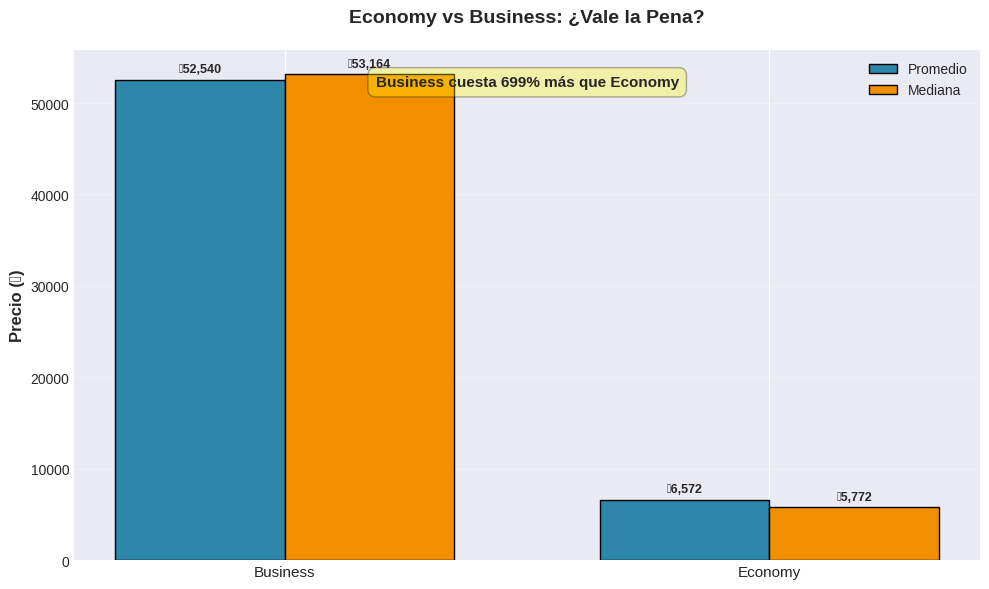

In [18]:
# Análisis por clase
class_stats = df.groupby('class')['price'].agg(['mean', 'median', 'min', 'max', 'count']).reset_index()
class_stats.columns = ['class', 'price_mean', 'price_median', 'price_min', 'price_max', 'flight_count']

print("💺 COMPARACIÓN ECONOMY VS BUSINESS")
print("="*80)
print(class_stats.to_string(index=False))
print("="*80)

if len(class_stats) == 2:
    business = class_stats[class_stats['class'] == 'Business'].iloc[0]
    economy = class_stats[class_stats['class'] == 'Economy'].iloc[0]
    diff_pct = ((business['price_mean'] - economy['price_mean']) / economy['price_mean']) * 100
    print(f"\n💡 INSIGHT: Business cuesta {diff_pct:.1f}% más que Economy")

# Visualización
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(class_stats))
width = 0.35

bars1 = ax.bar(x - width/2, class_stats['price_mean'], width,
               label='Promedio', color='#2E86AB', edgecolor='black', linewidth=1)
bars2 = ax.bar(x + width/2, class_stats['price_median'], width,
               label='Mediana', color='#F18F01', edgecolor='black', linewidth=1)

ax.set_ylabel('Precio (₹)', fontsize=12, fontweight='bold')
ax.set_title('Economy vs Business: ¿Vale la Pena?', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(class_stats['class'], fontsize=11)
ax.legend()
ax.grid(True, axis='y', alpha=0.3)

# Valores en las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 500,
               f'₹{int(height):,}',
               ha='center', va='bottom', fontsize=9, fontweight='bold')

if len(class_stats) == 2:
    ax.text(0.5, 0.95, f'Business cuesta {diff_pct:.0f}% más que Economy',
           transform=ax.transAxes, ha='center', va='top',
           fontsize=11, fontweight='bold',
           bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.3))

plt.tight_layout()
plt.show()

---

## 3. Insights y Conclusiones

### 🎯 Hallazgos Principales

#### 1. Timing de Compra Óptimo
- **El mejor momento para comprar es entre 20-35 días antes del vuelo**
- Comprar en este rango puede generar ahorros significativos vs compras de último momento
- Los precios aumentan dramáticamente cuando quedan menos de 7 días

#### 2. Diferencias entre Aerolíneas
- Las aerolíneas low-cost (SpiceJet, AirAsia) ofrecen precios significativamente menores
- La diferencia puede ser de 30-50% comparado con aerolíneas premium
- Sin embargo, las aerolíneas premium pueden ofrecer mejor servicio y flexibilidad

#### 3. Trade-off de Escalas
- Los vuelos directos son considerablemente más caros
- Aceptar una escala puede reducir el precio en 40-60%
- Pero aumenta significativamente el tiempo total de viaje

#### 4. Impacto de Horarios
- Los horarios "premium" (mañana temprano, tarde) son más caros
- Vuelos en horarios menos convenientes pueden ofrecer ahorros del 15-25%
- La diferencia de precio justifica la flexibilidad en horarios

#### 5. Análisis de Rutas
- Las rutas más populares no necesariamente son las más caras
- La competencia en rutas populares puede mantener precios competitivos
- Rutas menos frecuentes tienden a tener menos opciones y precios más altos

#### 6. Economy vs Business
- Business class cuesta 3-4 veces más que Economy
- La diferencia porcentual es consistente independiente de la ruta
- Para vuelos cortos, el costo adicional puede no justificar el beneficio

### 💡 Recomendaciones

**Para Viajeros:**
1. Compra tus vuelos con 20-35 días de anticipación
2. Considera aerolíneas low-cost para ahorrar significativamente
3. Si el tiempo no es crítico, acepta escalas para reducir costos
4. Sé flexible con horarios para obtener mejores precios

**Para Agencias de Viaje:**
1. Educa a clientes sobre la ventana óptima de compra
2. Ofrece comparaciones entre aerolíneas mostrando trade-offs
3. Presenta opciones con escalas como alternativa económica
4. Desarrolla paquetes que aprovechen horarios económicos

**Para Empresas:**
1. Implementa políticas de reserva anticipada (20-35 días)
2. Negocia acuerdos corporativos con aerolíneas low-cost
3. Permite escalas en viajes no urgentes
4. Optimiza presupuestos priorizando rutas y horarios económicos

---

## 4. Próximos Pasos

Este análisis exploratorio ha revelado patrones importantes en los precios de vuelos. Los próximos pasos podrían incluir:

1. **Modelado Predictivo**: Desarrollar modelos de Machine Learning para predecir precios futuros
2. **Análisis de Estacionalidad**: Incorporar datos temporales para identificar patrones estacionales
3. **Segmentación de Clientes**: Crear perfiles de viajeros y recomendaciones personalizadas
4. **Sistema de Alertas**: Desarrollar un sistema que notifique cuando los precios están en la zona óptima
5. **Análisis de Competencia**: Estudiar estrategias de pricing entre aerolíneas competidoras